In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("stock_market.csv")
df.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00215000,07/30/2021,215.0,C,A,224.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00215000,07/30/2021,215.0,P,A,0.01,...,-1.0,0,1401,438.97,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00220000,07/30/2021,220.0,C,A,219.56,...,-1.0,0,1,438.97,NaN,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,07/30/2021,438.51,SPY 210730P00220000,07/30/2021,220.0,P,A,0.01,...,-1.0,50,328,438.97,NaN,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,07/30/2021,438.51,SPY 210730C00225000,07/30/2021,225.0,C,A,214.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0


In [3]:
df.columns

Index(['symbol', 'exchange', 'date', 'adjusted close', 'option symbol',
       'expiration', 'strike', 'call/put', 'style', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', '*', 'delta',
       'vega', 'gamma', 'theta', 'rho'],
      dtype='object')

In [4]:
 df['style'].unique()

array(['A'], dtype=object)

In [5]:
df['mean price'].isnull().any()

False

In [6]:
df['stock price for iv'].isnull().any()

False

### DATA EXTRACTION

In [7]:

df['call/put']= df['call/put'].apply( lambda x :1 if x == "C" else 0)
df['expiration'] = pd.to_datetime(df['expiration'])
df['expiration'] = df['expiration'].dt.strftime('%Y%m%d')
df['date'] = pd.to_datetime(df['date'])
df['date'] = df['date'].dt.strftime('%Y%m%d')
df.head()

,symbol,exchange,date,adjusted close,option symbol,expiration,strike,call/put,style,ask,...,iv,volume,open interest,stock price for iv,*,delta,vega,gamma,theta,rho
0,SPY,NYSEArca,20210730,438.51,SPY 210730C00215000,20210730,215.0,1,A,224.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0
1,SPY,NYSEArca,20210730,438.51,SPY 210730P00215000,20210730,215.0,0,A,0.01,...,-1.0,0,1401,438.97,NaN,0.0,0.0,0.0,0.0,0.0
2,SPY,NYSEArca,20210730,438.51,SPY 210730C00220000,20210730,220.0,1,A,219.56,...,-1.0,0,1,438.97,NaN,0.0,0.0,0.0,0.0,0.0
3,SPY,NYSEArca,20210730,438.51,SPY 210730P00220000,20210730,220.0,0,A,0.01,...,-1.0,50,328,438.97,NaN,0.0,0.0,0.0,0.0,0.0
4,SPY,NYSEArca,20210730,438.51,SPY 210730C00225000,20210730,225.0,1,A,214.56,...,-1.0,0,0,438.97,NaN,0.0,0.0,0.0,0.0,0.0


In [8]:
import numpy as np
df.replace("/",np.nan, inplace =True)
df.fillna({'date': '','expiration':''}, inplace=True)


### DATA VALIDATION AND CLEANSING

In [9]:
df2= df.drop(columns=["*","symbol","exchange","option symbol","style"])

### DATA AGGREGATION & REPRESENTATION is not necessary for our prediction

### DATA ANALYSIS

### Target variable exploration

The the given dataset, we are trying to predict mean values by analyzing the values of ask and bid.

## Numerical variable exploration

The minimum price of `mean price` feature is 0, maximum price is 416.06 . We can even find min,
max, mean, different quartiles and standard deviations of data for other numerical values as well.

In [10]:
df['mean price'].max()

416.06

In [11]:
df['mean price'].min()

0.0

In [12]:
df.describe()

,adjusted close,strike,call/put,ask,bid,mean price,iv,volume,open interest,stock price for iv,delta,vega,gamma,theta,rho
count,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000,221046.000000
mean,435.089149,398.702076,0.500000,41.667365,40.967420,41.315752,0.234593,405.715661,1660.743542,434.966436,0.102498,0.503011,0.005594,-0.042474,-0.067521
std,3.863763,93.725546,0.500001,60.504762,59.876656,60.189057,0.225324,5100.355521,6040.663628,3.837734,0.614277,0.544469,0.009183,0.040318,1.726706
min,424.970000,25.000000,0.000000,0.010000,0.000000,0.000000,-1.000000,0.000000,0.000000,425.020000,-1.000000,0.000000,0.000000,-0.779877,-15.741297
25%,432.930000,349.000000,0.000000,1.660000,1.500000,1.600000,0.139646,0.000000,1.000000,432.520000,-0.240680,0.061539,0.000718,-0.056856,-0.143418
50%,435.460000,411.000000,0.500000,15.910000,15.440000,15.650000,0.206940,0.000000,100.000000,435.440000,0.000000,0.293737,0.002824,-0.035767,0.000000
75%,438.510000,454.000000,1.000000,52.550000,51.550000,52.040000,0.306208,19.000000,918.000000,438.140000,0.731058,0.817714,0.006464,-0.014486,0.334990
max,441.020000,655.000000,1.000000,416.890000,415.230000,416.060000,1.805012,446333.000000,169905.000000,441.050000,1.000000,2.674587,0.185555,0.000000,5.584008


### Finding correleation between variables

<AxesSubplot: >

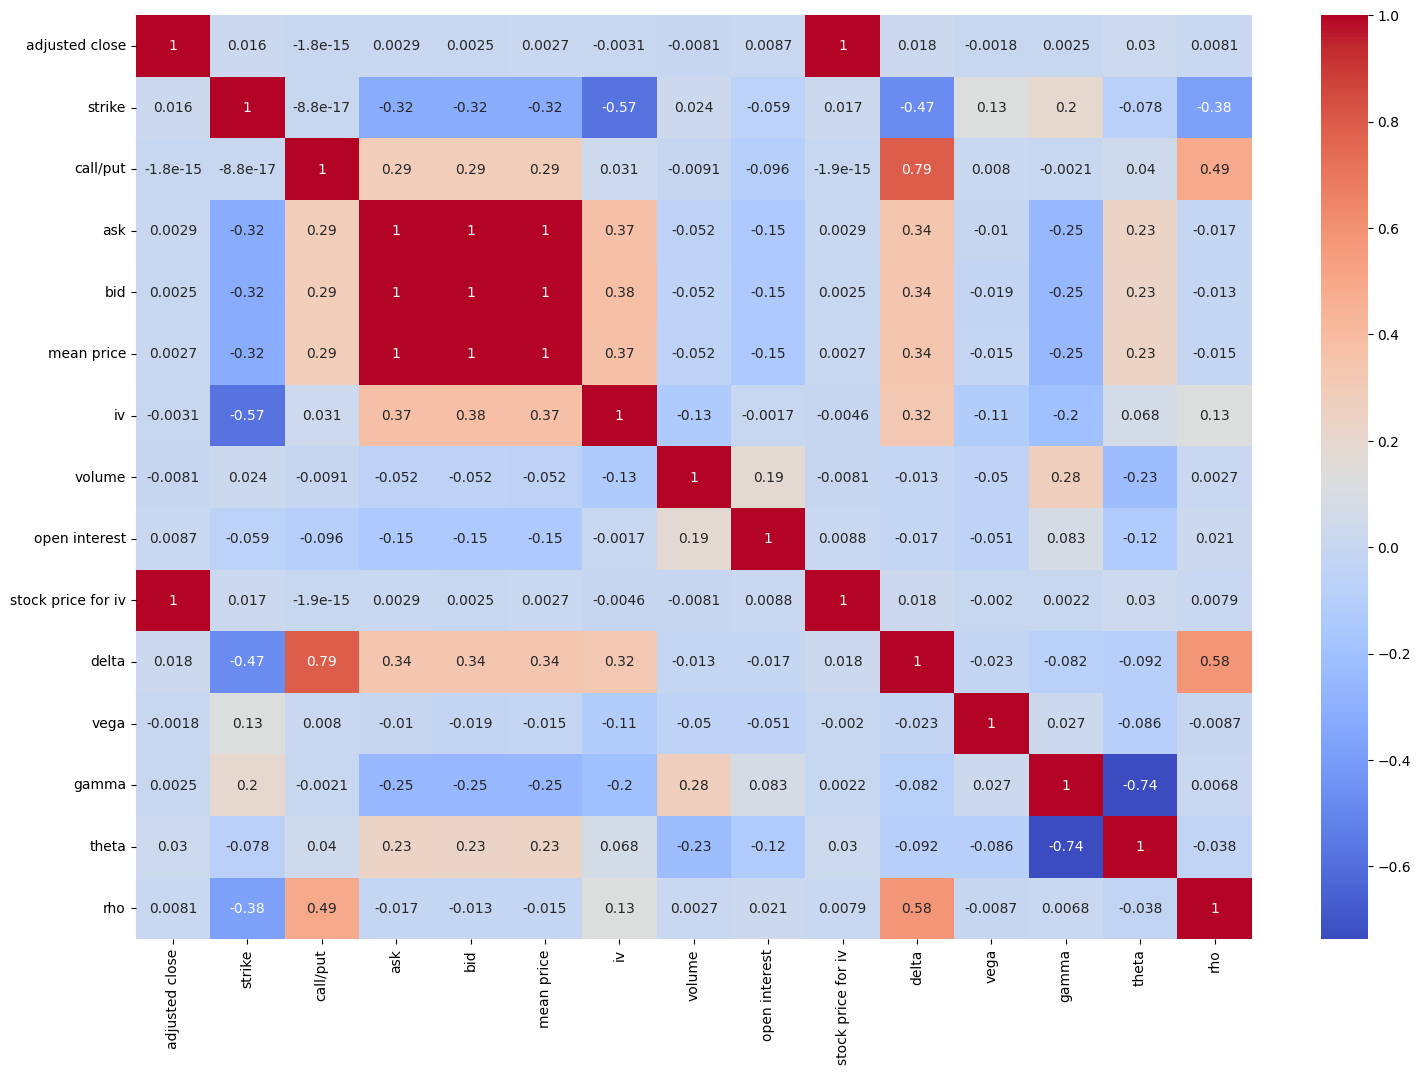

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize= (18,12))
sns.heatmap(df2.corr(),annot=True,cmap='coolwarm')


In [14]:
df.columns

Index(['symbol', 'exchange', 'date', 'adjusted close', 'option symbol',
       'expiration', 'strike', 'call/put', 'style', 'ask', 'bid', 'mean price',
       'iv', 'volume', 'open interest', 'stock price for iv', '*', 'delta',
       'vega', 'gamma', 'theta', 'rho'],
      dtype='object')

### Normalizing values using label encoding completed this step as a part of data extraction process

### Splitting the data into test and train subsets

In [15]:
# split to train and test datasets
cut_off_date='20210730'
train_df = df[df['date'] != cut_off_date]
test_df = df[df['date'] == cut_off_date]

In [16]:
print(train_df.shape)
print(test_df.shape)

(210320, 22)
(10726, 22)


In [17]:
X_train = train_df[['ask','bid']]
y_train = train_df['mean price']
X_test = train_df[['ask','bid']]
y_test = train_df['mean price']

### Build a machine-learning model

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [19]:
y_pred = model.predict(X_test)
y_pred

array([2.25096197e+02, 3.92288667e-03, 2.20095839e+02, ...,
       2.08988053e+02, 2.00671843e+00, 2.13988411e+02])

### Perform a cross-validation technique

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error,r2_score

mse = mean_squared_error(y_test,y_pred)
r_squared = r2_score(y_test,y_pred)
print(f"MSE: {mse}\nR_Squared: {r_squared}")

MSE: 0.0036741330380102265
R_Squared: 0.9999989861007684


### DATA VISUALISATION

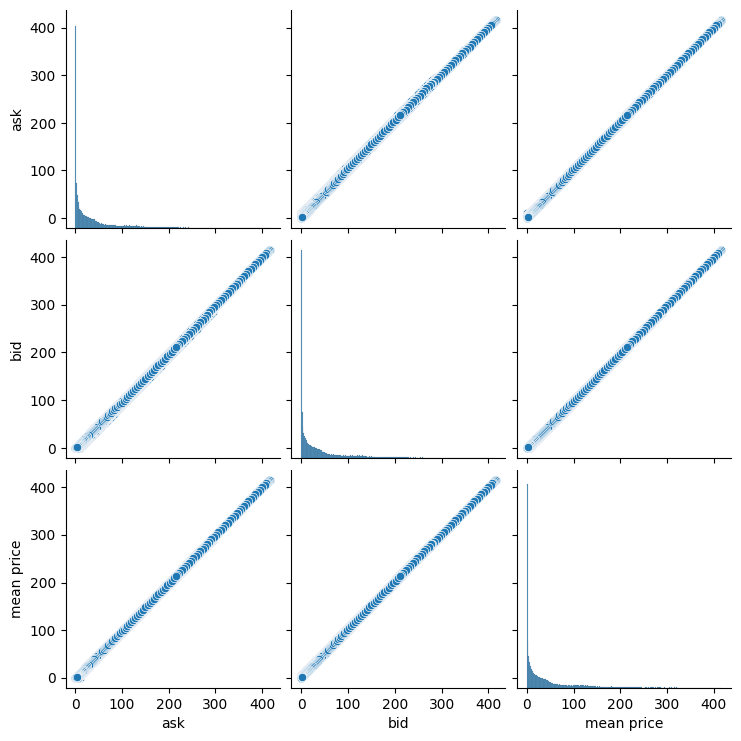

In [21]:
sel_col=train_df[[ 'ask', 'bid', 'mean price']]
sns.pairplot(sel_col)
plt.show()

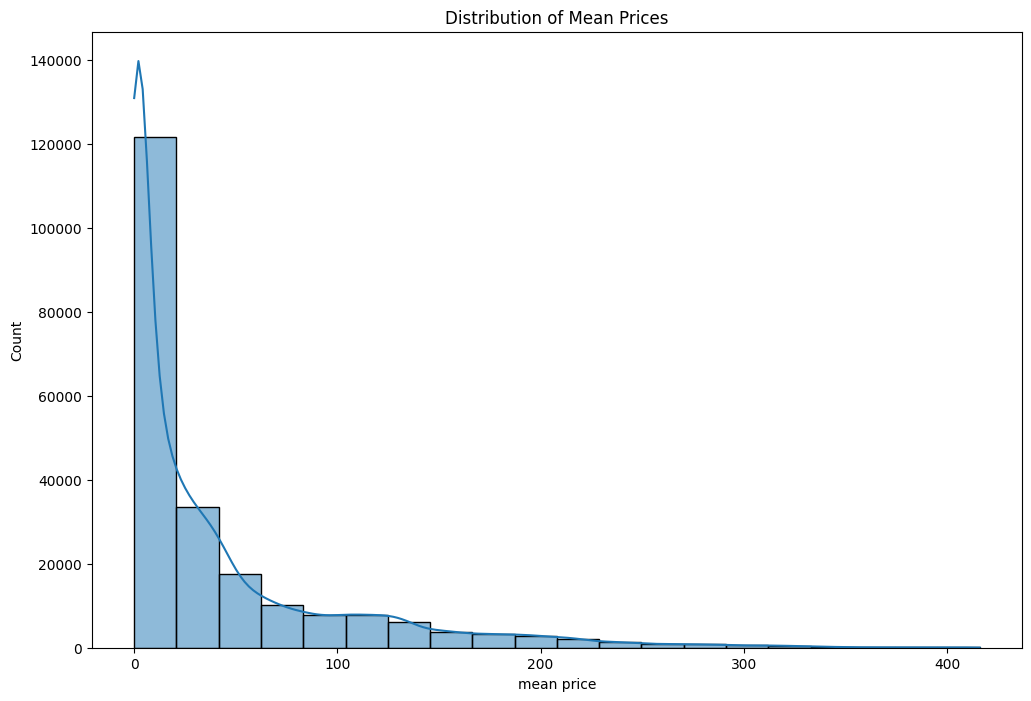

In [22]:
# Histogram for 'bid' prices
plt.figure(figsize=(12, 8))
sns.histplot(df['mean price'].dropna(), kde=True, bins = 20)
plt.title('Distribution of Mean Prices')
plt.show()

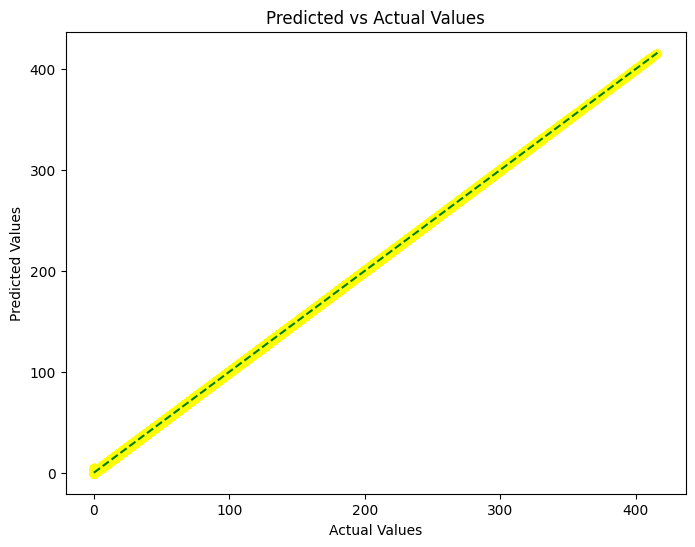

In [23]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='yellow', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

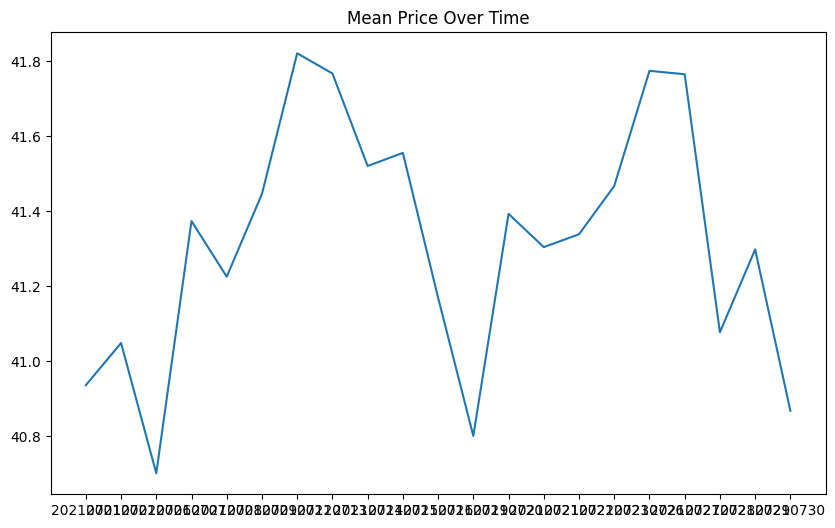

In [24]:
# Line plot for 'stock price for iv' over time
plt.figure(figsize=(10, 6))
mean_df = df.groupby(['date']).aggregate({'mean price': 'mean'})
plt.plot(mean_df)
plt.title('Mean Price Over Time')
plt.show()


### Conclusion

We are predicting the value of meanprice using the abaove visualisation as 41.8 for the date 07/30/2021.

In [28]:
x=df[df['date']=='20210730']
x.groupby('date').aggregate({'mean price' : 'mean'})

,mean price
date,
20210730,40.867185
